# Convert the AE waveform

Convert the AE waveform for the MWE of ARX calibration.

2023.08.10 Kurama Okubo

In [1]:
import os
from obspy import read
import numpy as np
import scipy.io as sio
from obspy.core.utcdatetime import UTCDateTime  

os.environ['TZ'] = 'GMT' # change time zone to avoid confusion in unix_tvec conversion
UTCDateTime.DEFAULT_PRECISION = 8

# Load data

In [2]:
st = read("../data/obs_waveform_event__fb03-087__0000.pickle") # AE Event occured in fb03-087

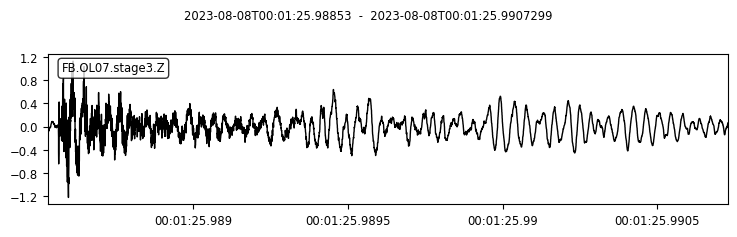

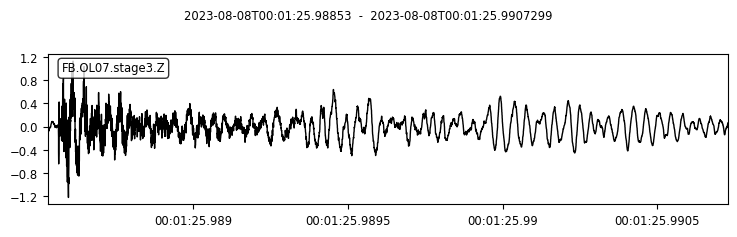

In [3]:
# before resp removal
stid = "OL07"
tr_before = st.select(station=stid, location="stage3")[0] # stage 2 is just after the removal of preamp resp
tr_before.plot()

In [4]:
# preprocess, bandpath and trimming the waveform
twinlen = 0.5e-3
freqmin, freqmax = 0.6e5, 6e5 
tr_before_trim_filt = tr_before.copy().detrend(type='constant').detrend(type='linear').taper(0.01).filter("bandpass", freqmin=freqmin, freqmax=freqmax, corners=4, zerophase=True).trim(tr_before.stats.starttime, tr_before.stats.starttime+twinlen)


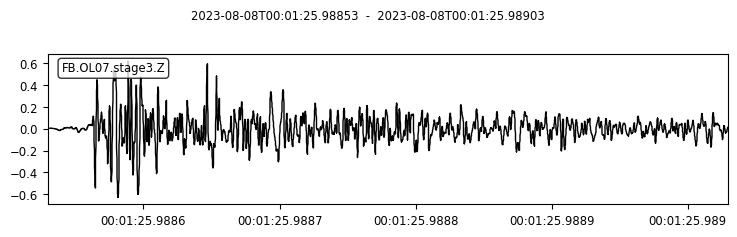

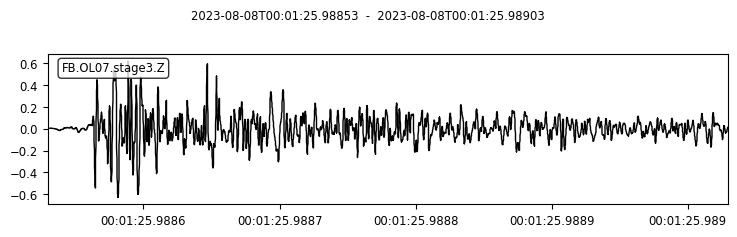

In [5]:
tr_before_trim_filt.plot()

In [6]:
# dump the trace
tr_before_trim_filt.write(f"../data/AE_waveform_fb03-087_{stid}.sac", format="SAC")  